In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix ,recall_score, roc_auc_score , roc_curve, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        pred = np.where(pred>0.5, 1,0) ## To Find the Threshold use the Auc Roc Curve

        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ConfusionMatrixDisplay.from_predictions(y_train, pred) 
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        pred = np.where(pred>0.5, 1,0) ## To Find the Threshold use the Auc Roc Curve
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ConfusionMatrixDisplay.from_predictions(y_test, pred) 
        plt.show()
        

pd.set_option('display.max_columns', 500)
   ### VIF SCORE : ---------->
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i] , variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], 
                        columns = ["FEATURE" , "VARIANCE INFLATION FACTOR"]) 

In [2]:
data = pd.read_csv("WELFake_Dataset.csv",usecols=['title', 'label'], encoding='unicode_escape')

C:\Users\hp\AppData\Local\Temp\ipykernel_10952\2661790341.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("WELFake_Dataset.csv",usecols=['title', 'label'], encoding='unicode_escape')


In [3]:
data.head(2)

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,NaN,1


In [4]:
print("shape of the data ", data.shape)
print("-"*121)
print(data.isnull().sum())
print("-"*100)
print(data.duplicated().value_counts())

shape of the data  (78097, 2)
-------------------------------------------------------------------------------------------------------------------------
title    2961
label    4321
dtype: int64
----------------------------------------------------------------------------------------------------
False    67996
True     10101
Name: count, dtype: int64


In [5]:
data['label'].unique()

array(['1', '0', nan, ...,
       ' regardless of age differences. Itâ\x80\x99s a more civil way of life. There are loaded pistols',
       ' thanks entirely to the Marxist liberals. Fembot220 ', ' google'],
      dtype=object)

In [6]:
def text_preprocessing(x):
    try:
        return int(x)
    except Exception as e:
        return np.nan
data['label'] = data['label'].apply(lambda x: text_preprocessing(x))

In [7]:
data = data.dropna().drop_duplicates().reset_index(drop = True)

In [8]:
data.shape

(62261, 2)

In [9]:
data.head(1)

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1.0


In [24]:
## Get the independent feature
x = data.drop("label", axis =1 )
y = data['label']

In [25]:
data['label'].unique()

array([1.00000e+00, 0.00000e+00, 2.12569e+05, 1.91700e+03, 1.92000e+03,
       1.94700e+03, 5.00000e+02, 3.70000e+01])

In [26]:
messages = x.copy()

import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
sentences = messages['title'].to_list()

corpus = [
    ' '.join(lemmatizer.lemmatize(word) for word in re.sub('[^a-zA-Z]', ' ', sentence.lower()).split() if word not in stop_words)
    for sentence in sentences
]

In [27]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [28]:
## unique_word in a data set 
yy = ([(i.split()) for i in x['title']])
unique_word_in_a_dataset = len(set([i for i in yy for i in i ]))
unique_word_in_a_dataset

83953

In [29]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Dense,Bidirectional

In [30]:
### NOW WE Will Use One Hot Encoding 
from tensorflow.keras.preprocessing.text import one_hot

vocab_size = 5000 ## 5k word in a dictionary

one_hot_rep = [one_hot(i, vocab_size) for i in corpus]

In [31]:
one_hot_rep[0]

[4513, 2898, 3164, 4196, 1264, 673, 4149, 1522, 4442, 3589, 2712, 3877]

In [32]:
corpus[0]

'law enforcement high alert following threat cop white blacklivesmatter fyf terrorist video'

### Embedding Representation

In [33]:
max_sentence_length = max([len(i.split()) for i in corpus])
print("max_length of the sentence in the corpus list :--->", max_sentence_length)

max_length of the sentence in the corpus list :---> 47


In [34]:
## Pre - Padding 
sent_length = max_sentence_length
embedded_docs = pad_sequences(one_hot_rep, maxlen=max_sentence_length, padding='pre')
embedded_docs

array([[   0,    0,    0, ..., 3589, 2712, 3877],
       [   0,    0,    0, ..., 1291,  781, 3877],
       [   0,    0,    0, ..., 4506, 1769, 1394],
       ...,
       [   0,    0,    0, ..., 4680,  988, 2897],
       [   0,    0,    0, ..., 1682,  524, 4810],
       [   0,    0,    0, ..., 3824,  945,  117]])

In [35]:
print("one hot representation 1st sentence:---->",one_hot_rep[0])
print("-"*130)
print("First Sentences:------------------------>",corpus[0])
print("-"*130)
print("embedded document of 1st sentence:------>",embedded_docs[0])

one hot representation 1st sentence:----> [4513, 2898, 3164, 4196, 1264, 673, 4149, 1522, 4442, 3589, 2712, 3877]
----------------------------------------------------------------------------------------------------------------------------------
First Sentences:------------------------> law enforcement high alert following threat cop white blacklivesmatter fyf terrorist video
----------------------------------------------------------------------------------------------------------------------------------
embedded document of 1st sentence:------> [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 4513 2898 3164 4196 1264  673 4149
 1522 4442 3589 2712 3877]


## CREATING AN LSTM  MODEL ALONG WITH EMBEDDING LAYER

In [36]:
embedding_vector_feature = 40 ##feature Representation
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_feature, input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 47, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
print(len(embedded_docs), y.shape)

62261 (62261,)


In [38]:
import numpy as np
x_final = np.array(embedded_docs)
y_final = np.array(y)

In [39]:
print("x_final.shape",x_final.shape)
print("y_final.shape",y_final.shape)

x_final.shape (62261, 47)
y_final.shape (62261,)


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.5)

x_train, x_test = np.float32(x_train), np.float32(x_test)

In [41]:
y_train

array([1., 0., 1., ..., 0., 0., 0.])

In [43]:
print("x_train.shape",x_train.shape)
print("x_test.shape",x_test.shape)

print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

x_train.shape (31130, 47)
x_test.shape (31131, 47)
y_train.shape (31130,)
y_test.shape (31131,)


## Model Training

In [44]:
### Final Training 
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=64)

Epoch 1/10
487/487 [==============================] - 52s 92ms/step - loss: -8.6236 - accuracy: 0.7381 - val_loss: 0.1614 - val_accuracy: 0.8287
Epoch 2/10
487/487 [==============================] - 44s 91ms/step - loss: -26.0945 - accuracy: 0.6479 - val_loss: 0.0068 - val_accuracy: 0.7732
Epoch 3/10
487/487 [==============================] - 72s 148ms/step - loss: -63.3438 - accuracy: 0.7753 - val_loss: 4.8323 - val_accuracy: 0.4493
Epoch 4/10
487/487 [==============================] - 50s 103ms/step - loss: -115.1826 - accuracy: 0.5039 - val_loss: -0.4903 - val_accuracy: 0.7310
Epoch 5/10
487/487 [==============================] - 50s 102ms/step - loss: -157.5161 - accuracy: 0.7602 - val_loss: -1.7289 - val_accuracy: 0.7695
Epoch 6/10
487/487 [==============================] - 49s 100ms/step - loss: -181.9143 - accuracy: 0.7908 - val_loss: -1.8725 - val_accuracy: 0.7722
Epoch 7/10
487/487 [==============================] - 47s 96ms/step - loss: -200.9638 - accuracy: 0.7902 - val_loss

## PERFORMANCE METRICS AND ACCURACY :--->

In [45]:
y_pred = model.predict(x_test)

973/973 [==============================] - 19s 19ms/step


In [46]:
y_pred = np.where(y_pred>0.5, 1,0) ## To Find the Threshold use the Auc Roc Curve

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, y_pred)

array([[15052,  2105,     0,     0],
       [ 4410,  9562,     0,     0],
       [    0,     1,     0,     0],
       [    0,     1,     0,     0]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

79.06588288201472


973/973 [==============================] - 18s 19ms/step


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 82.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  37.0  500.0  1947.0  212569.0  \
precision      0.804571      0.872721   0.0    0.0     0.0       0.0   
recall         0.914613      0.725470   0.0    0.0     0.0       0.0   
f1-score       0.856070      0.792312   0.0    0.0     0.0       0.0   
support    17204.000000  13922.000000   1.0    1.0     1.0       1.0   

           accuracy     macro avg  weighted avg  
precision  0.829907      0.279549      0.834946  
recall     0.829907      0.273347      0.829907  
f1-score   0.829907      0.274730      0.827446  
support    0.829907  31130.000000  31130.000000  
_______________________________________________


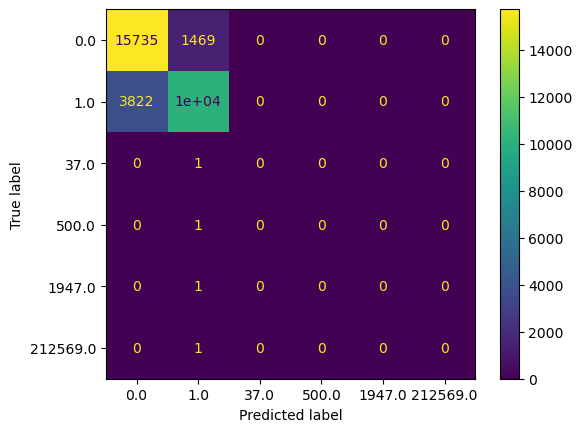

973/973 [==============================] - 20s 20ms/step


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 79.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  1917.0  1920.0  accuracy     macro avg  \
precision      0.773405      0.819436     0.0     0.0  0.790659      0.398210   
recall         0.877310      0.684369     0.0     0.0  0.790659      0.390420   
f1-score       0.822087      0.745837     0.0     0.0  0.790659      0.391981   
support    17157.000000  13972.000000     1.0     1.0  0.790659  31131.000000   

           weighted avg  
precision      0.794014  
recall         0.790659  
f1-score       0.787812  
support    31131.000000  
_______________________________________________


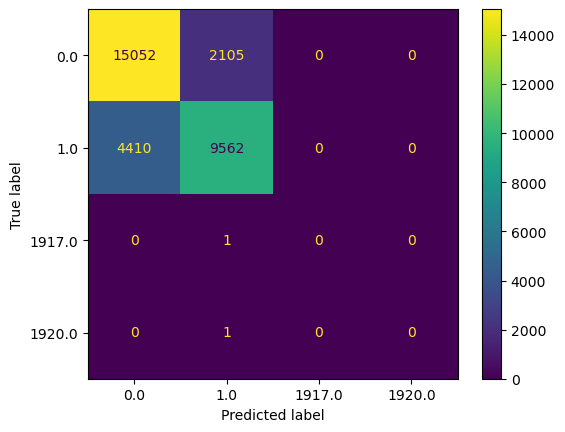

In [50]:
print_score(model, x_train, y_train, x_test, y_test, train=True)
print_score(model, x_train, y_train, x_test, y_test, train=False)